In [152]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import recordlinkage
from sklearn.feature_extraction.text import TfidfVectorizer
## nltk imports
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
# ! pip install xlrd
# ! pip install openpyxl
## lda 
from gensim import corpora
import gensim
import plotnine
from plotnine import *
## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## define constants and pathnames
GITHUB_DATA_PATH = "../data/"
DROPBOX_DATA_PATH = "../../../qss20_finalproj_rawdata/textasdata/"
MERGED_TEXT_JOBS_PKL = "../merged_addendums_jobdisclosures.pkl"
MERGED_TEXT_JOBS_CSV = "../merged_addendums_jobdisclosures.csv"


# Functions

In [94]:
## Text Processing
def processtext(row, colname, stopword_list,indicator, min_token_length = 4):
    
    ## get string form of listing
    string_of_col = str(row[colname]).lower()
    try:
        ## remove stopwords 
        remove_stop = [word for word in wordpunct_tokenize(string_of_col)
                      if word not in stopword_list]
        if indicator=="stem":
            processed_string = " ".join([porter.stem(i) 
                        for i in remove_stop if 
                        i.isalpha() and len(i) >= min_token_length])
        return(processed_string)
    except:
        processed_string = "" # to handle data errors where not actually text
        return(processed_string)


# Load merged data from previous script

In [7]:
merged_data = pd.read_pickle(MERGED_TEXT_JOBS_PKL)
merged_data.shape

# test csv; same num rows so should be fine to load as alternative if needed
merged_data_csv = pd.read_csv(DROPBOX_DATA_PATH + MERGED_TEXT_JOBS_CSV)
# merged_data_csv.shape

(13136, 142)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,31,45,83,84,138,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(13136, 142)

# Preprocess text

In [82]:
work_pattern = r"[a-zA-Z]*work[a-zA-Z]*"
all_listings = "".join(merged_data.JOB_DESCRIPTION)
all_tokens = word_tokenize(all_listings)

all_matches_work = [one_word for one_word in all_tokens if 
                   re.match(work_pattern, one_word)]

other_stopwords = ["after", "before", "employer", "employ", "job", "although", "provide", "complete","hour","time",
                  "begin","list","require","transportation"]+ all_matches_work

list_stopwords = stopwords.words("english")

stopwords_complete = list_stopwords + other_stopwords
    
porter = PorterStemmer()


In [92]:

merged_data['text_preprocess'] = merged_data.apply(processtext,
                             axis = 1,
                             args = ["JOB_DESCRIPTION", stopwords_complete,"stem"])
merged_data.head()


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,HOURLY_SCHEDULE_BEGIN,HOURLY_SCHEDULE_END,TRLA,JOB_DESCRIPTION,text_preprocess
0,H-300-20265-835437,Determination Issued - Certification,2020-09-24 15:28:31.310,2020-09-30 00:00:00.000,Individual Employer,Y,Seasonal,N,Benito Martinez Jr.,NaN,...,55.0,14073199505,benitomartinez863@gmail.com,NaN,0.0,NaN,NaN,False,the most economical and reasonable charges for...,econom reason charg
1,H-300-20260-827678,Determination Issued - Certification,2020-09-16 17:02:31.850,2020-09-24 00:00:00.000,Association - Joint Employer,N,Seasonal,N,WESTERN RANGE ASSOCIATION,NaN,...,55.0,12085952226,applicants@westernrange.net,NaN,0.0,NaN,NaN,False,Incoming transportation and subsistence advanc...,incom subsist advanc
2,H-300-20260-827308,Determination Issued - Certification,2020-09-16 17:07:11.850,2020-09-24 00:00:00.000,Association - Agent,N,Seasonal,N,Allen Ranches LLC,NaN,...,55.0,13074722105,info@mpaswy.com,NaN,0.0,NaN,NaN,False,An employee may be terminated for just cause. ...,employe termin caus
3,H-300-20260-827308,Determination Issued - Denied,2020-12-07 23:47:36.020,2020-12-28 00:00:00.000,Association - Agent,N,Seasonal,N,Allen Ranches LLC,NaN,...,55.0,13074722105,info@mpaswy.com,NaN,0.0,NaN,NaN,True,An employee may be terminated for just cause. ...,employe termin caus
4,H-300-20259-823987,Determination Issued - Withdrawn,2020-09-18 15:28:28.690,2020-09-29 00:00:00.000,Individual Employer,N,Seasonal,N,Floyd Frey,NaN,...,55.0,14062650953,floydfrey@yahoo.com,NaN,0.0,NaN,NaN,False,"Kitchen facilities, utilities and utensils wil...",kitchen facil util utensil


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,HOURLY_SCHEDULE_BEGIN,HOURLY_SCHEDULE_END,TRLA,JOB_DESCRIPTION,text_preprocess,text_not_stem
0,H-300-20265-835437,Determination Issued - Certification,2020-09-24 15:28:31.310,2020-09-30 00:00:00.000,Individual Employer,Y,Seasonal,N,Benito Martinez Jr.,NaN,...,14073199505,benitomartinez863@gmail.com,NaN,0.0,NaN,NaN,False,the most economical and reasonable charges for...,econom reason charg,
1,H-300-20260-827678,Determination Issued - Certification,2020-09-16 17:02:31.850,2020-09-24 00:00:00.000,Association - Joint Employer,N,Seasonal,N,WESTERN RANGE ASSOCIATION,NaN,...,12085952226,applicants@westernrange.net,NaN,0.0,NaN,NaN,False,Incoming transportation and subsistence advanc...,incom subsist advanc,
2,H-300-20260-827308,Determination Issued - Certification,2020-09-16 17:07:11.850,2020-09-24 00:00:00.000,Association - Agent,N,Seasonal,N,Allen Ranches LLC,NaN,...,13074722105,info@mpaswy.com,NaN,0.0,NaN,NaN,False,An employee may be terminated for just cause. ...,employe termin caus,
3,H-300-20260-827308,Determination Issued - Denied,2020-12-07 23:47:36.020,2020-12-28 00:00:00.000,Association - Agent,N,Seasonal,N,Allen Ranches LLC,NaN,...,13074722105,info@mpaswy.com,NaN,0.0,NaN,NaN,True,An employee may be terminated for just cause. ...,employe termin caus,
4,H-300-20259-823987,Determination Issued - Withdrawn,2020-09-18 15:28:28.690,2020-09-29 00:00:00.000,Individual Employer,N,Seasonal,N,Floyd Frey,NaN,...,14062650953,floydfrey@yahoo.com,NaN,0.0,NaN,NaN,False,"Kitchen facilities, utilities and utensils wil...",kitchen facil util utensil,


# Subset Merged_Data to TRLA and NonTRLA States

In [84]:
# TRLA
merged_TRLA=merged_data[merged_data.TRLA==True]
# NonTRLA
merged_nonTRLA=merged_data[merged_data.TRLA==False]

# Raw term frequency (Tf-Idf)

In [119]:
vectorizer = TfidfVectorizer()
def tfidf_topwords(df,label):
    tf_idf = vectorizer.fit_transform(df['text_preprocess'])
    top_words = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names())
    stored=top_words.sum(axis=0).sort_values(ascending=False).head(10)
    plot=stored.plot.bar(title=label)
    plot.set_xlabel('Words')
    plot.set_ylabel('Tf-idf Score')
    fig = plot.get_figure()
    fig.savefig(label+".png")

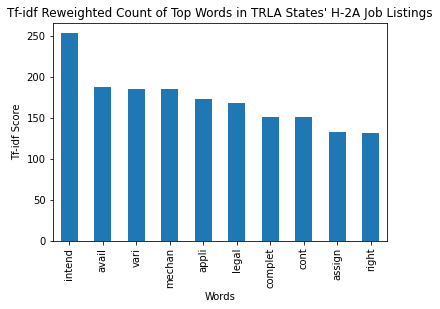

In [120]:
tfidf_topwords(merged_TRLA,"Tf-idf Reweighted Count of Top Words in TRLA States' H-2A Job Listings")

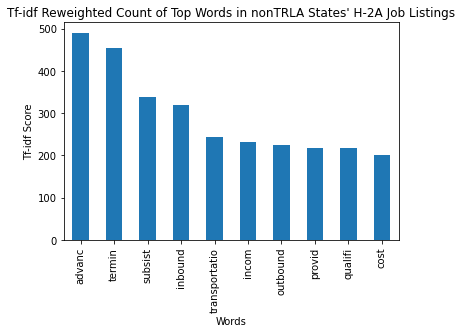

In [121]:
tfidf_topwords(merged_nonTRLA,"Tf-idf Reweighted Count of Top Words in nonTRLA States' H-2A Job Listings")

# Investigate the stemmed word "termin" in the original corpus

In [139]:
merged_data["JOB_DESCRIPTION"]=merged_data['JOB_DESCRIPTION'].astype("string")
pd.set_option('display.max_colwidth', None)
# termin=merged_data[(merged_data['JOB_DESCRIPTION'].str.contains("termin")) &
#            (merged_data.TRLA)].JOB_DESCRIPTION
termin=merged_nonTRLA.JOB_DESCRIPTION.loc[merged_nonTRLA['JOB_DESCRIPTION'].str.contains("termin")].drop_duplicates()
for one_text in termin:
    print(one_text)

An employee may be terminated for just cause. O...
TERMINATION: The employer may terminate the wor...
TERMINATIONS:  The employer may terminate the w...
Termination: Employer may terminate the worker ...
 determined in paragraph (i) of this section, s...
:  The employer may terminate the worker if the...
determined in paragraph (i) of this section, se...
The employer may terminate the worker with noti...
The work contract shall be terminated before th...
TERMINATION.  Employer may terminate a worker f...
The employer may terminate the worker if the wo...
TERMINATION:  The employer may terminate the wo...
TERMINATIONS: The employer may terminate the wo...
Work hours are determined by crop and weather c...
\nThe company may discipline and/ or terminate ...
The company may discipline and/ or terminate a ...
 TERMINATION: The employer may terminate the wo...
General:\nThe employer may terminate the worker...
Employer may discipline and/or terminate the wo...
Workers who voluntarily quit or

# LDA Topic Modeling

try to merge the topic model and plot into a single function.....

In [145]:
## topic modeling (TRLA states)
def topic_model(df):
    df = df[df.text_preprocess != ""].copy()
    tokenized_text = [wordpunct_tokenize(one_text) for one_text in 
                                      df.text_preprocess]
    text_proc_dict = corpora.Dictionary(tokenized_text)
    text_proc_dict.filter_extremes(no_below = round(df.shape[0]*0.02),
                             no_above = round(df.shape[0]*0.98))
    corpus_fromdict_proc = [text_proc_dict.doc2bow(one_text) 
                   for one_text in tokenized_text]
    ldamod = gensim.models.ldamodel.LdaModel(corpus_fromdict_proc, 
                                         num_topics = 3, id2word=text_proc_dict, 
                                         passes=6, alpha = 'auto',
                                        per_word_topics = True)
    topics_fromshow2 = [ldamod.show_topic(topicid = i, topn = 10) for i in [0, 1, 2]]
    return(topics_fromshow2)
    

[[('avail', 0.13801399),
  ('vari', 0.13096412),
  ('mechan', 0.13005942),
  ('complet', 0.086956784),
  ('cont', 0.0858013),
  ('physic', 0.07311963),
  ('threaten', 0.071055144),
  ('anoth', 0.071053244),
  ('tani', 0.062188916),
  ('must', 0.037061933)],
 [('right', 0.1849868),
  ('domest', 0.18459341),
  ('reserv', 0.18024905),
  ('assign', 0.10915622),
  ('employ', 0.10508352),
  ('provid', 0.08860646),
  ('wage', 0.07831296),
  ('offer', 0.06143265),
  ('intend', 0.00069378497),
  ('advanc', 0.00041423604)],
 [('intend', 0.19026962),
  ('appli', 0.19015312),
  ('legal', 0.1703398),
  ('cost', 0.13922726),
  ('hous', 0.09754111),
  ('rule', 0.07484597),
  ('advanc', 0.07016637),
  ('provid', 0.060847647),
  ('must', 0.00043688805),
  ('tobacco', 0.00038652122)]]

[[('complet', 0.28184053),
  ('cont', 0.27807269),
  ('tobacco', 0.098158844),
  ('nworker', 0.08964566),
  ('advanc', 0.08651167),
  ('pull', 0.07975926),
  ('sucker', 0.075924136),
  ('cost', 0.0017149667),
  ('appli', 0.0005278801),
  ('legal', 0.00050250813)],
 [('avail', 0.17662378),
  ('vari', 0.16760659),
  ('mechan', 0.16644827),
  ('intend', 0.09267027),
  ('appli', 0.09242935),
  ('legal', 0.08280956),
  ('assign', 0.04754365),
  ('must', 0.047468845),
  ('employ', 0.046281256),
  ('provid', 0.042010527)],
 [('physic', 0.11596319),
  ('anoth', 0.112693),
  ('threaten', 0.11268812),
  ('right', 0.09984538),
  ('domest', 0.09963726),
  ('tani', 0.09863244),
  ('reserv', 0.09728652),
  ('cost', 0.08326913),
  ('hous', 0.058702007),
  ('rule', 0.04331523)]]

[[('termin', 0.1855847),
  ('hous', 0.09984179),
  ('cost', 0.09339592),
  ('offer', 0.07892523),
  ('equip', 0.06888756),
  ('paid', 0.067273006),
  ('wage', 0.057870317),
  ('tool', 0.05747532),
  ('higher', 0.054836445),
  ('advanc', 0.04532365)],
 [('requir', 0.12843855),
  ('commun', 0.10474372),
  ('electron', 0.10374583),
  ('phone', 0.09972531),
  ('compens', 0.097199015),
  ('ncell', 0.096463576),
  ('along', 0.07765691),
  ('employ', 0.069278374),
  ('complet', 0.06797231),
  ('must', 0.063816585)],
 [('advanc', 0.15526477),
  ('subsist', 0.11446041),
  ('inbound', 0.087154746),
  ('incom', 0.07337365),
  ('outbound', 0.071385816),
  ('qualifi', 0.067975),
  ('transportatio', 0.05873029),
  ('reason', 0.0535615),
  ('provid', 0.052560326),
  ('state', 0.043380424)]]

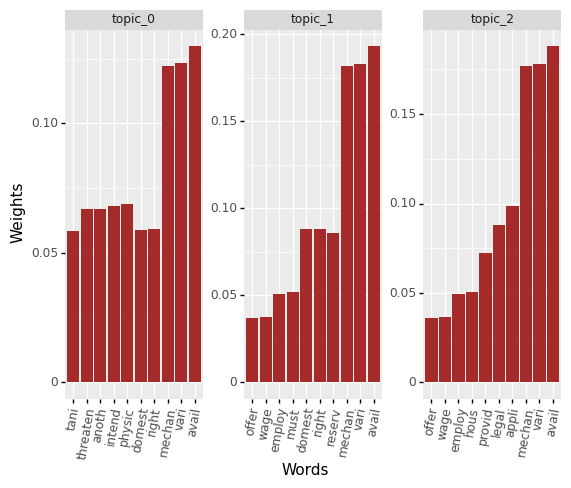

<ggplot: (8760118742781)>

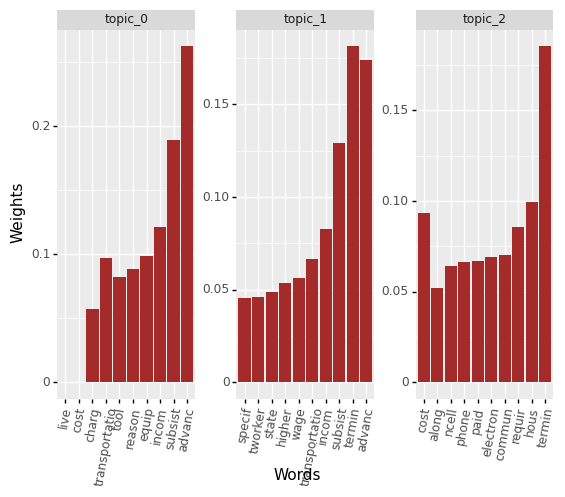

<ggplot: (8760118475743)>

In [153]:
#function to create table suitable for plotting LDA modeling's result
def df_onetopic(one_listoftup, i):
    words = [one_tup[0] for one_tup in one_listoftup]
    weights = [one_tup[1] for one_tup in one_listoftup]
    words_weights_df = pd.DataFrame({'words': words, 'weights': weights})
    words_weights_df['topic'] = "topic_" + str(i)
    return(words_weights_df)
topic_model(merged_TRLA)
topic_model(merged_nonTRLA)

#plot TRLA model
all_summary = []
for i in range(0, len(topic_model(merged_TRLA))):
    one_summary = df_onetopic(topic_model(merged_TRLA)[i], i)
    all_summary.append(one_summary)
all_summary_df = pd.concat(all_summary)
ggplot(all_summary_df) +\
    geom_bar(aes(x="reorder(words,weights)",y="weights"),stat="identity", fill="brown")+ facet_wrap("topic",scales = "free")+theme(subplots_adjust={'wspace': 0.30})+\
    theme(axis_text_x = element_text(angle = 80)) + \
    labs(x="Words", y="Weights")


#plot nonTRLA model
all_summary = []
for i in range(0, len(topic_model(merged_nonTRLA))):
    one_summary = df_onetopic(topic_model(merged_nonTRLA)[i], i)
    all_summary.append(one_summary)
all_summary_df = pd.concat(all_summary)
ggplot(all_summary_df) +\
    geom_bar(aes(x="reorder(words,weights)",y="weights"),stat="identity", fill="brown")+ facet_wrap("topic",scales = "free")+theme(subplots_adjust={'wspace': 0.30})+\
    theme(axis_text_x = element_text(angle = 80)) + \
    labs(x="Words", y="Weights")



In [ ]:
# Code Below Is Draft (uncleaned)

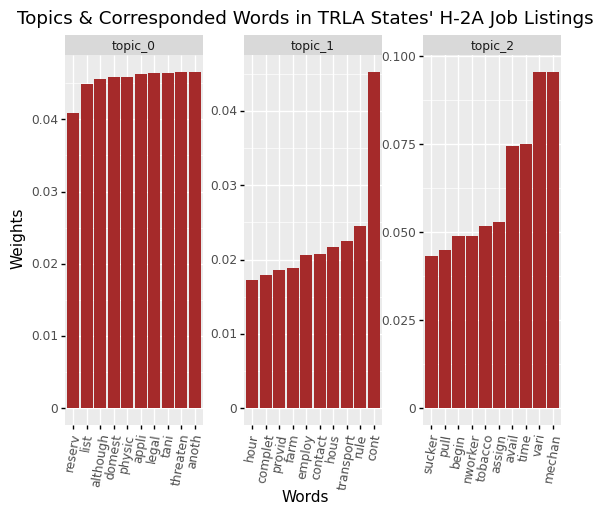

<ggplot: (8769739236602)>

In [37]:
import plotnine
from plotnine import *

ggplot(all_summary_df) +\
    geom_bar(aes(x="reorder(words,weights)",y="weights"),stat="identity", fill="brown")+ facet_wrap("topic",scales = "free")+theme(subplots_adjust={'wspace': 0.30})+\
    theme(axis_text_x = element_text(angle = 80)) + \
    labs(x="Words", y="Weights",title="Topics & Corresponded Words in TRLA States' H-2A Job Listings")

In [38]:
## topic modeling (nonTRLA states)

merged_nonTRLA = merged_nonTRLA[merged_nonTRLA.text_preprocess != ""].copy()

tokenized_text_nonTRLA = [wordpunct_tokenize(one_text) for one_text in 
                                      merged_nonTRLA.text_preprocess]

## preprocess and estimate topicmod
### create dictionary
text_proc_dict_nonTRLA = corpora.Dictionary(tokenized_text_nonTRLA)
### filter dictionary- using 2% as bounds
text_proc_dict_nonTRLA.filter_extremes(no_below = round(merged_nonTRLA.shape[0]*0.02),
                             no_above = round(merged_nonTRLA.shape[0]*0.98))

### create corpus from dictionary
corpus_fromdict_proc_non = [text_proc_dict_nonTRLA.doc2bow(one_text) 
                   for one_text in tokenized_text_nonTRLA]

tfidf_non = models.TfidfModel(corpus_fromdict_proc_non)
corpus_tfidf_non = tfidf[corpus_fromdict_proc_non]

lda_model_tfidf_non = gensim.models.LdaMulticore(corpus_tfidf_non, num_topics=3, id2word=text_proc_dict_nonTRLA, passes=6,
                                        per_word_topics = True, random_state = 91988)

topics_nontrla = lda_model_tfidf_non.print_topics()
for topic in topics_nontrla:
    print(topic)

(0, '0.066*"advanc" + 0.033*"transport" + 0.029*"complet" + 0.028*"provid" + 0.028*"hous" + 0.026*"harvest" + 0.026*"offer" + 0.021*"subsist" + 0.020*"hour" + 0.019*"commun"')
(1, '0.050*"transport" + 0.045*"requir" + 0.044*"tool" + 0.038*"wage" + 0.038*"equip" + 0.033*"bonus" + 0.030*"higher" + 0.030*"suppli" + 0.029*"employe" + 0.027*"termin"')
(2, '0.119*"inbound" + 0.075*"specif" + 0.070*"cost" + 0.068*"state" + 0.064*"outbound" + 0.057*"qualifi" + 0.051*"provid" + 0.050*"york" + 0.039*"transport" + 0.033*"item"')


In [39]:
topics_fromshow2_non = [lda_model_tfidf_non.show_topic(topicid = i, topn = 10) for i in [0, 1, 2]]
def df_onetopic(one_listoftup, i):
    words = [one_tup[0] for one_tup in one_listoftup]
    weights = [one_tup[1] for one_tup in one_listoftup]
    words_weights_df = pd.DataFrame({'words': words, 'weights': weights})
    words_weights_df['topic'] = "topic_" + str(i)
    return(words_weights_df)
all_summary_non = []
for i in range(0, len(topics_fromshow2_non)):
    one_summary_non = df_onetopic(topics_fromshow2_non[i], i)
    all_summary_non.append(one_summary_non)
all_summary_df_non = pd.concat(all_summary_non)
all_summary_df_non

,words,weights,topic
0,advanc,0.065896,topic_0
1,transport,0.032925,topic_0
2,complet,0.028915,topic_0
3,provid,0.028383,topic_0
4,hous,0.028149,topic_0
5,harvest,0.026048,topic_0
6,offer,0.025877,topic_0
7,subsist,0.021037,topic_0
8,hour,0.020109,topic_0
9,commun,0.019435,topic_0


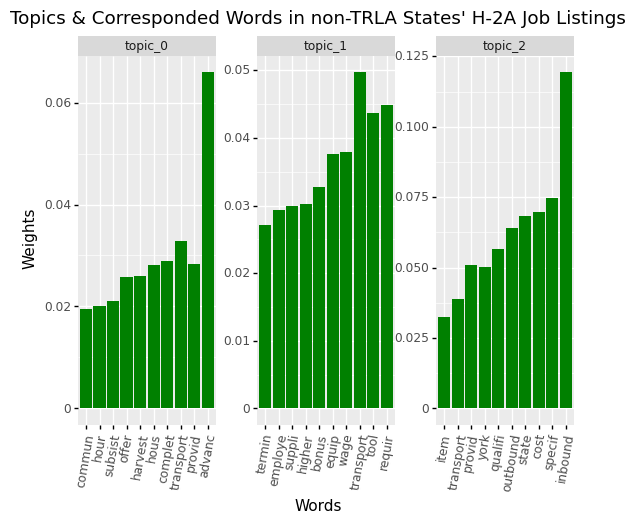

<ggplot: (8769739236515)>

In [40]:
import plotnine
from plotnine import *

ggplot(all_summary_df_non) +\
    geom_bar(aes(x="reorder(words,weights)",y="weights"),stat="identity", fill="green")+ facet_wrap("topic",scales = "free")+theme(subplots_adjust={'wspace': 0.30})+\
    theme(axis_text_x = element_text(angle = 80)) + \
    labs(x="Words", y="Weights",title="Topics & Corresponded Words in non-TRLA States' H-2A Job Listings")

In [41]:
## topic modeling (whole document)
 
merged_data = merged_data[merged_data.text_preprocess != ""].copy()

tokenized_text_all = [wordpunct_tokenize(one_text) for one_text in 
                                      merged_data.text_preprocess]

## preprocess and estimate topicmod
### create dictionary
text_proc_dict_all = corpora.Dictionary(tokenized_text_all)
### filter dictionary- using 2% as bounds
text_proc_dict_all.filter_extremes(no_below = round(merged_data.shape[0]*0.02),
                             no_above = round(merged_data.shape[0]*0.98))

### create corpus from dictionary
corpus_fromdict_proc_all = [text_proc_dict_all.doc2bow(one_text) 
                   for one_text in tokenized_text_all]

tfidf_all = models.TfidfModel(corpus_fromdict_proc_all)
corpus_tfidf_all = tfidf[corpus_fromdict_proc_all]

lda_model_tfidf_all = gensim.models.LdaMulticore(corpus_tfidf_all, num_topics=3, id2word=text_proc_dict_all, passes=6,
                                        per_word_topics = True, random_state = 91988)

#print words and topic separate...
topics_all = lda_model_tfidf_all.print_topics(num_words = 10)
for topic in topics_all:
    print(topic)

(0, '0.069*"advanc" + 0.033*"employe" + 0.032*"although" + 0.032*"physic" + 0.029*"reserv" + 0.028*"inbound" + 0.028*"outbound" + 0.028*"legal" + 0.028*"threaten" + 0.028*"right"')
(1, '0.047*"transport" + 0.035*"rule" + 0.029*"requir" + 0.029*"hous" + 0.027*"provid" + 0.025*"offer" + 0.022*"must" + 0.021*"applic" + 0.020*"inbound" + 0.018*"harvest"')
(2, '0.102*"time" + 0.065*"cont" + 0.059*"complet" + 0.057*"vari" + 0.049*"transport" + 0.041*"reimburs" + 0.040*"avail" + 0.038*"begin" + 0.036*"nworker" + 0.027*"provid"')


In [42]:
topics_fromshow2_all = [lda_model_tfidf_all.show_topic(topicid = i, topn = 10) for i in [0, 1, 2]]

def df_onetopic(one_listoftup, i):
    words = [one_tup[0] for one_tup in one_listoftup]
    weights = [one_tup[1] for one_tup in one_listoftup]
    words_weights_df = pd.DataFrame({'words': words, 'weights': weights})
    words_weights_df['topic'] = "topic_" + str(i)
    return(words_weights_df)
all_summary_all = []
for i in range(0, len(topics_fromshow2_all)):
    one_summary_all = df_onetopic(topics_fromshow2_all[i], i)
    all_summary_all.append(one_summary_all)
all_summary_df_all = pd.concat(all_summary_all)
all_summary_df_all

,words,weights,topic
0,advanc,0.068731,topic_0
1,employe,0.032710,topic_0
2,although,0.032299,topic_0
3,physic,0.031685,topic_0
4,reserv,0.028534,topic_0
5,inbound,0.028151,topic_0
6,outbound,0.028058,topic_0
7,legal,0.027972,topic_0
8,threaten,0.027624,topic_0
9,right,0.027550,topic_0


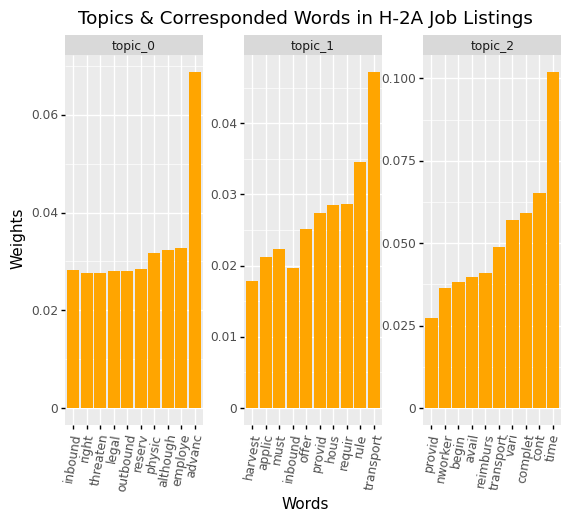

<ggplot: (8769739219035)>

In [43]:
import plotnine
from plotnine import *

ggplot(all_summary_df_all) +\
    geom_bar(aes(x="reorder(words,weights)",y="weights"),stat="identity", fill="orange")+ facet_wrap("topic",scales = "free")+theme(subplots_adjust={'wspace': 0.30})+\
    theme(axis_text_x = element_text(angle = 80)) + \
    labs(x="Words", y="Weights",title="Topics & Corresponded Words in H-2A Job Listings")